# Wolf and Elk 
Lotka - Volterra Model


In [7]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [36]:
alpha = 0.05
beta = 0.1
gamma = 0.1
delta = 0.1

0.1

In [37]:
def make_system(alpha, beta, delta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(x = 1, y = 1)

    t0 = 0
    t_end = 2000

    return System(init=init, t0=t0, t_end=t_end, alpha=alpha, beta=beta, delta=delta, gamma=gamma)

In [51]:
def update_func(state, t, system):
    unpack(system)
    
    x, y = state
    
    dx = (alpha * x) - (beta * x * y)
    dy = (delta * x * y) - (gamma * y)
    print(x,y,dx,dy)
    elk = x + dx 
    wolf = y + dy
    
    
    
    return State(elk = elk, wolf = wolf)

In [52]:
def update_func1(state, t, system):
    """Update the SIR model.
    
    state: State(x, y)
    t: time
    system: System object
    
    returns: State(x, y)
    """
    unpack(system)
    x, y = state

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    
    x += dxdt
    y += dydt
    
    return State(x=x, y=y)

In [53]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [54]:
system = make_system(alpha, beta, delta, gamma)

,values
init,x 1 y 1 dtype: int64
t0,0
t_end,2000
alpha,0.05
beta,0.1
delta,0.1
gamma,0.1


1 1 -0.05 0.0
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan na

nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan 

nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan 

nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan nan nan
nan nan 

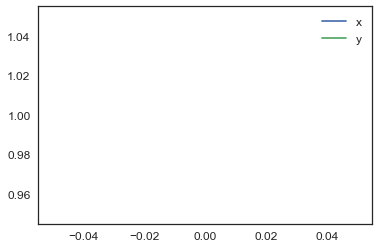

In [55]:
results = run_simulation(system, update_func)
results.plot()

In [50]:
results = run_simulation(system, update_func)
print(results)

        x    y
0       1    1
1     NaN  NaN
2     NaN  NaN
3     NaN  NaN
4     NaN  NaN
5     NaN  NaN
6     NaN  NaN
7     NaN  NaN
8     NaN  NaN
9     NaN  NaN
10    NaN  NaN
11    NaN  NaN
12    NaN  NaN
13    NaN  NaN
14    NaN  NaN
15    NaN  NaN
16    NaN  NaN
17    NaN  NaN
18    NaN  NaN
19    NaN  NaN
20    NaN  NaN
21    NaN  NaN
22    NaN  NaN
23    NaN  NaN
24    NaN  NaN
25    NaN  NaN
26    NaN  NaN
27    NaN  NaN
28    NaN  NaN
29    NaN  NaN
...   ...  ...
1971  NaN  NaN
1972  NaN  NaN
1973  NaN  NaN
1974  NaN  NaN
1975  NaN  NaN
1976  NaN  NaN
1977  NaN  NaN
1978  NaN  NaN
1979  NaN  NaN
1980  NaN  NaN
1981  NaN  NaN
1982  NaN  NaN
1983  NaN  NaN
1984  NaN  NaN
1985  NaN  NaN
1986  NaN  NaN
1987  NaN  NaN
1988  NaN  NaN
1989  NaN  NaN
1990  NaN  NaN
1991  NaN  NaN
1992  NaN  NaN
1993  NaN  NaN
1994  NaN  NaN
1995  NaN  NaN
1996  NaN  NaN
1997  NaN  NaN
1998  NaN  NaN
1999  NaN  NaN
2000  NaN  NaN

[2001 rows x 2 columns]
